# Regularization
Regularization is an important concept that is used to avoid overfitting of the data, especially when the trained and test data are varying much.

Regularization is implemented by adding a “penalty” term to the best fit derived from the trained data, to achieve a lesser variance with the tested data and also restricts the influence of predictor variables over the output variable by compressing their coefficients.

In regularization, what we do is normally we keep the same number of features but reduce the magnitude of the coefficients. We can reduce the magnitude of the coefficients by using different types of regression techniques which uses regularization to overcome this problem. So, let us discuss them.

# About The Data
For this lab, we'll be revisiting the lab 4 housing dataset and comparing the below regression techniques:

    Linear Regression
    Ridge Regression
    Lasso Regression
    
The dataset that we'll be using for this task comes from kaggle.com and contains the following attributes:

'Avg. Area Income': Avg. income of residents of the city house is located in.
'Avg. Area House Age': Avg age of houses in same city
'Avg. Area Number of Rooms': Avg number of rooms for houses in same city
'Avg. Area Number of Bedrooms': Avg number of bedrooms for houses in same city
'Area Population': Population of city house is located in
'Price': Price that the house sold at (target)
'Address': Address for the house

In [1]:
# Importing numpy, pandas, matplotlib, seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing rcParams
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
# My practical code
# Import warnings to ignore all warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Example code from pdf
# Load the data into a pandas DataFrame
housing_data = pd.read_csv('USA_Housing.csv')
housing_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
# My practical code
# return first 15 rows
housing_data.head(15)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [6]:
# Example code from pdf
# Get a better sense of the data
housing_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
# My practical code
# Lets include all to see any other values
housing_data.describe(include = 'all')

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,5000
top,NaN,NaN,NaN,NaN,NaN,NaN,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
freq,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06,NaN
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05,NaN
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04,NaN
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05,NaN
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06,NaN
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06,NaN


In [8]:
# Example code from pdf
# See any missing values
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
# My practical code
# Another way to see any missing values
housing_data.isnull().any()

Avg. Area Income                False
Avg. Area House Age             False
Avg. Area Number of Rooms       False
Avg. Area Number of Bedrooms    False
Area Population                 False
Price                           False
Address                         False
dtype: bool

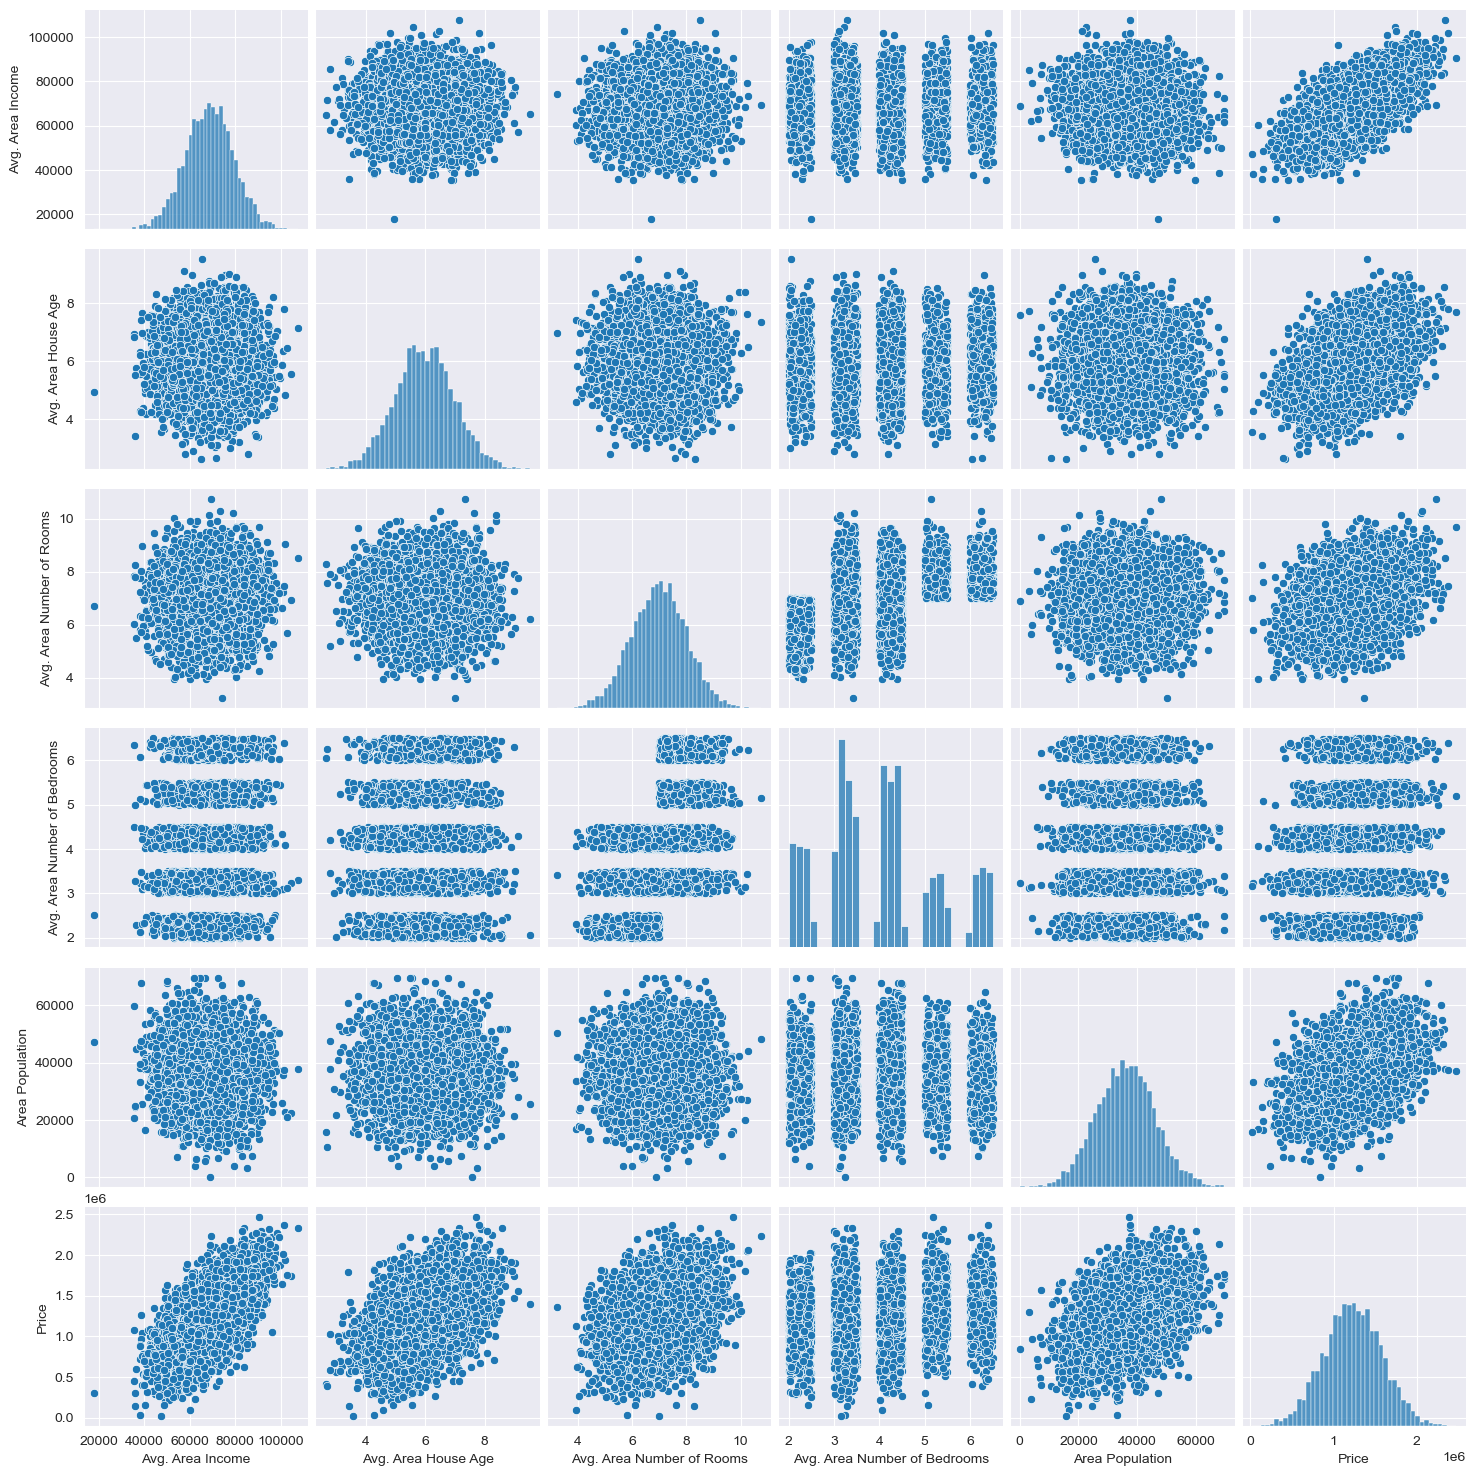

In [10]:
# Example code from pdf
# Using pairplot to have an idea of the relationships and distributions from the dataset
sns.pairplot(housing_data)
plt.show()

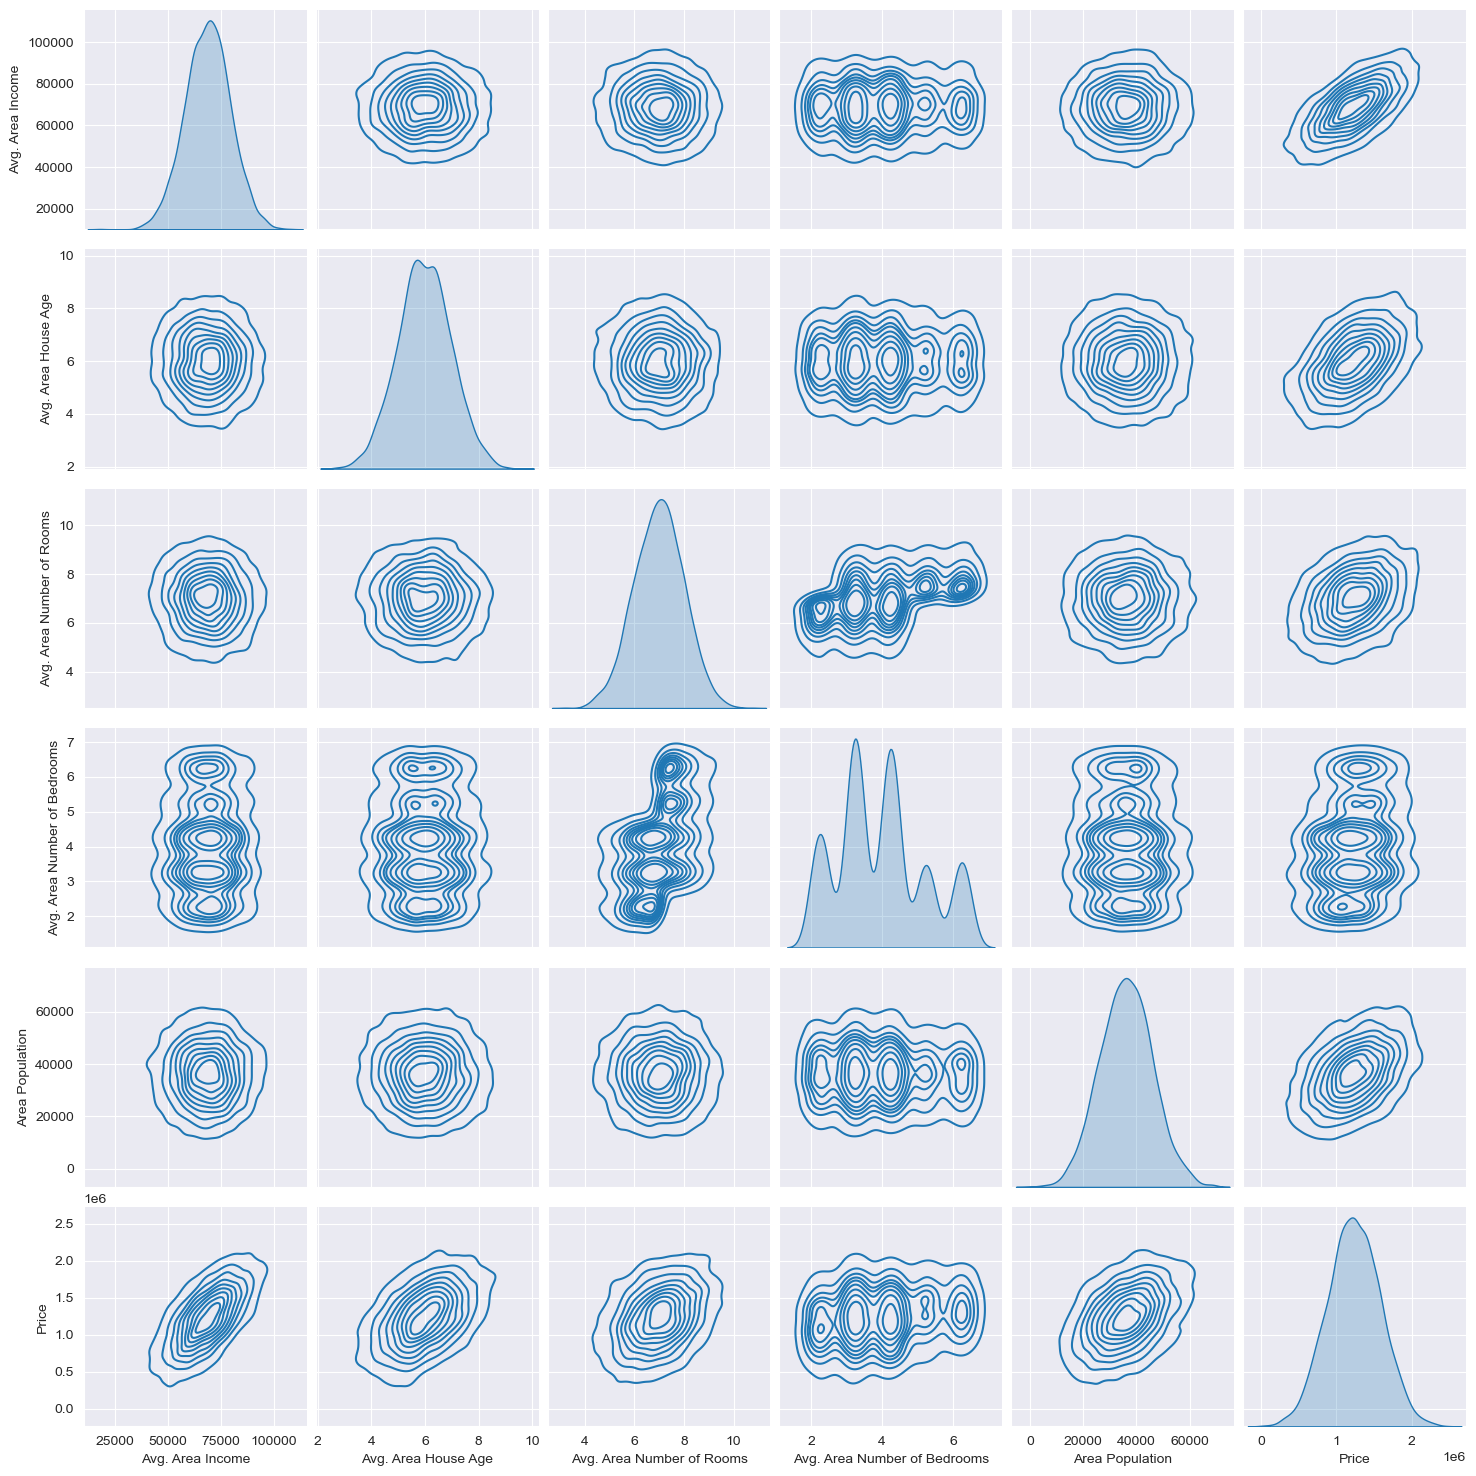

In [11]:
# My practical code
# kind = "kde" to change some visual effects
sns.pairplot(housing_data, kind = "kde")
plt.show()

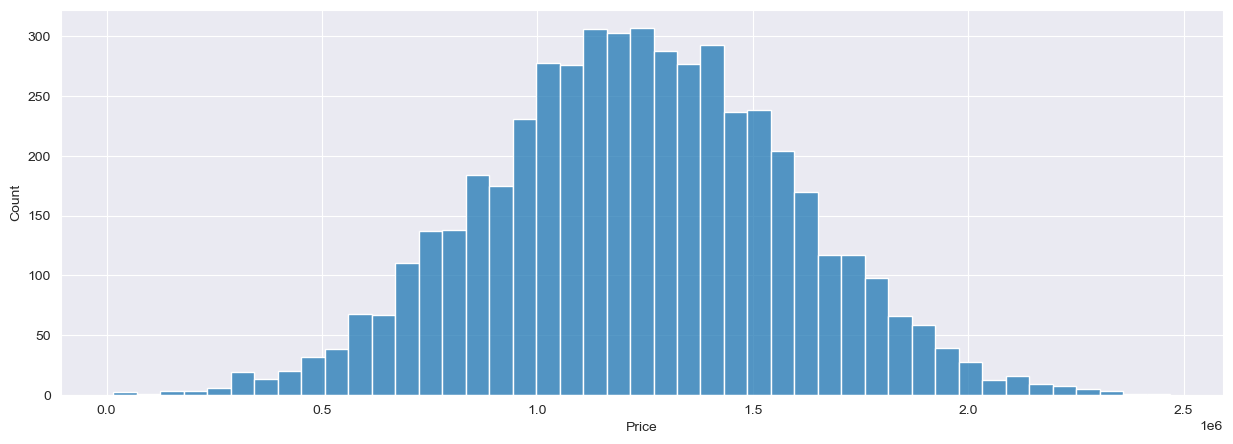

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64


In [12]:
# Example code from pdf
# A closer look at price hist chart
# Print describe data for price
sns.histplot(housing_data['Price'])
plt.show()
print(housing_data['Price'].describe())

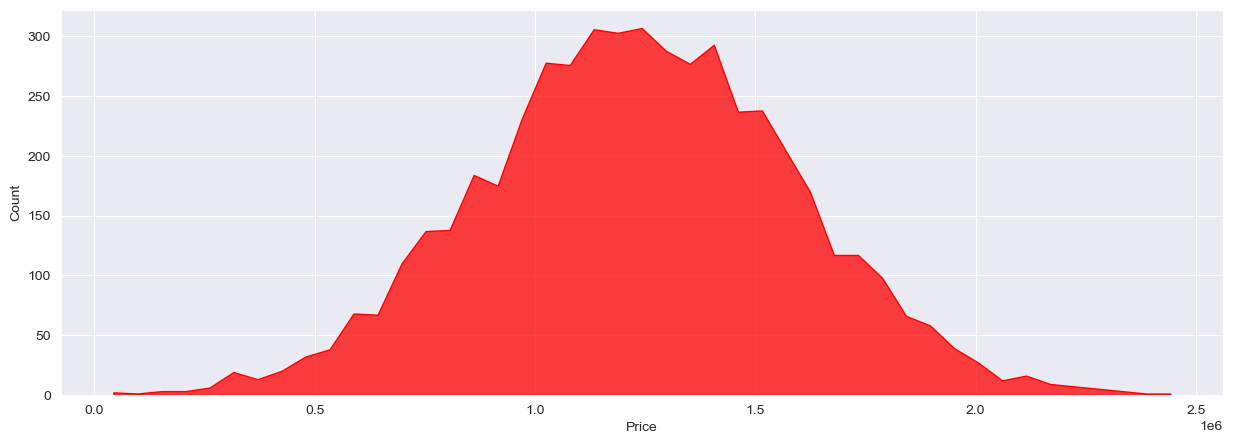

In [13]:
# Example code from pdf
# Modify few things 
sns.histplot(housing_data['Price'], element = "poly", color = "red")
plt.show()

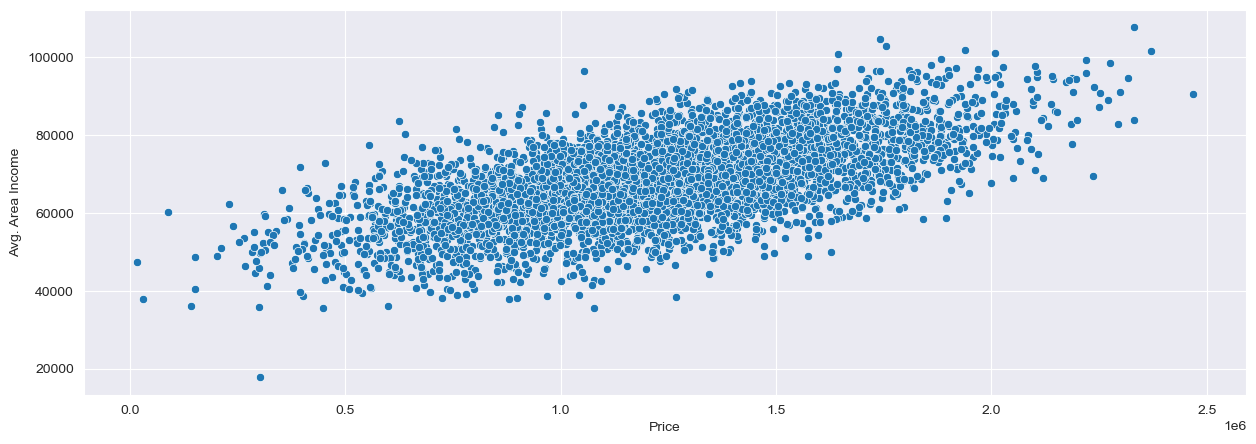

In [14]:
# Example code from pdf
# Create a scatterplot of Price vs. Avg. Area Income
sns.scatterplot(x = 'Price', y = 'Avg. Area Income', data = housing_data)
plt.show()

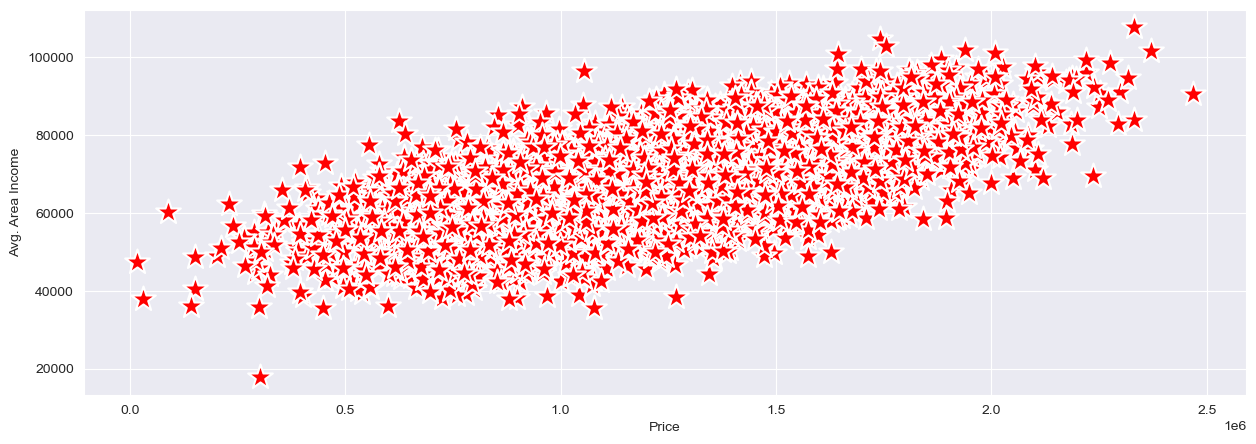

In [15]:
# My practical code
# modify few things
sns.scatterplot(x = 'Price', y = 'Avg. Area Income', data = housing_data, color = "red", marker = "*", s = 350)
plt.show()

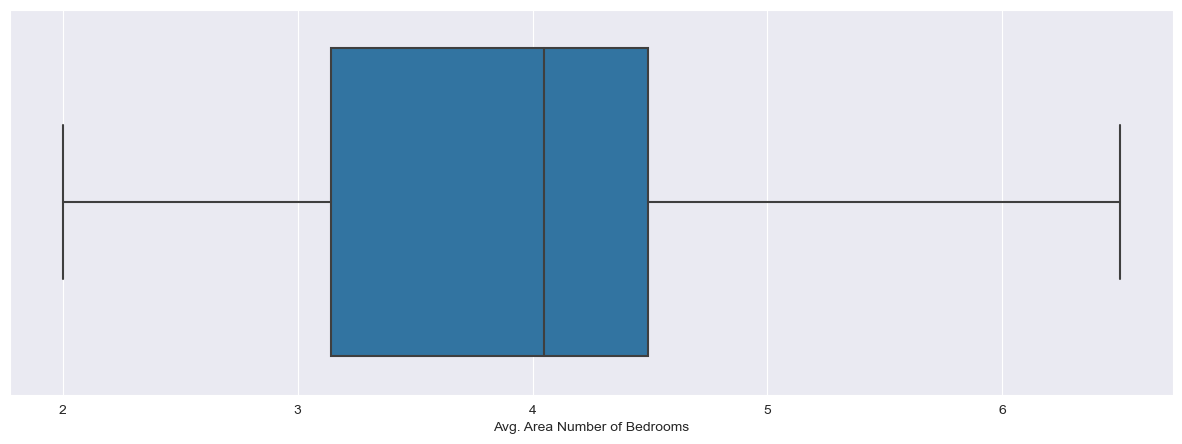

In [16]:
# Example code from pdf
# Create a boxplot of Avg. Area Number of Bedrooms
sns.boxplot(x = 'Avg. Area Number of Bedrooms', data = housing_data)
plt.show()

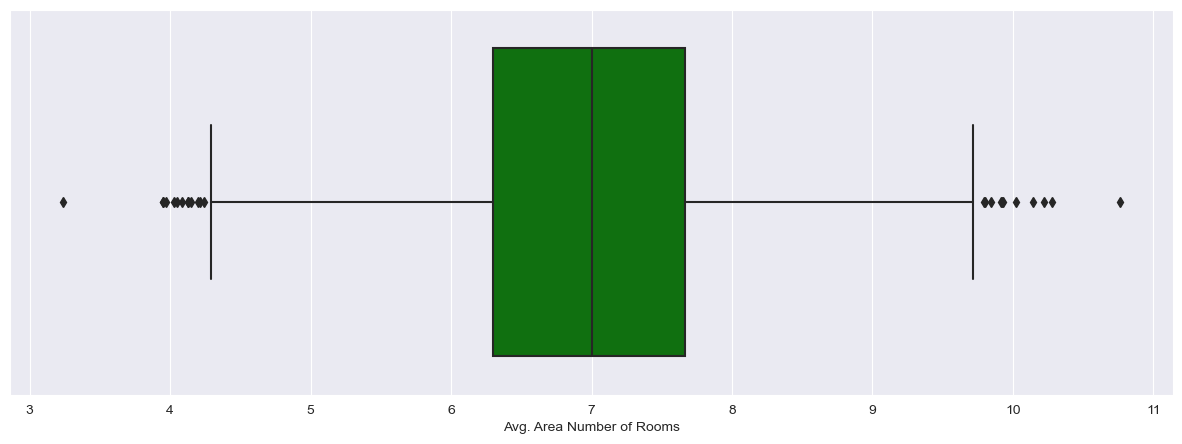

In [17]:
# My practical code
# Create a boxplot of Avg. Area Number of rooms
sns.boxplot(x = 'Avg. Area Number of Rooms', data = housing_data, color = "green")
plt.show()

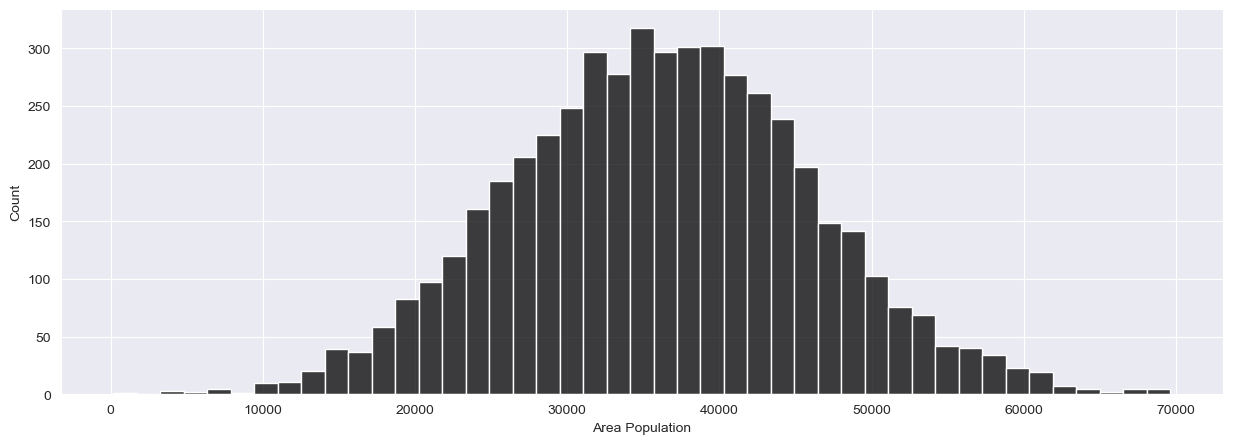

In [18]:
# My practical code
# Create histplot of Area Population
sns.histplot(x = 'Area Population', data = housing_data, color = "black")
plt.show()

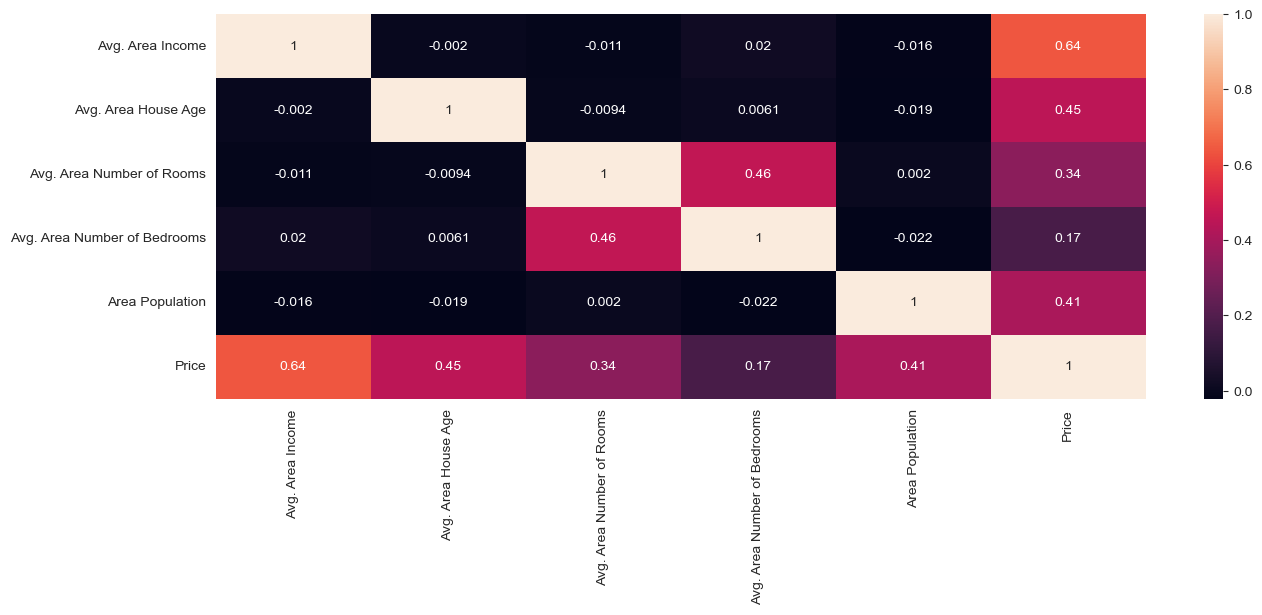

In [19]:
# Example code from pdf
# Create a heatmap to see the correlation of the data
sns.heatmap(housing_data.corr(), annot = True)
plt.show()

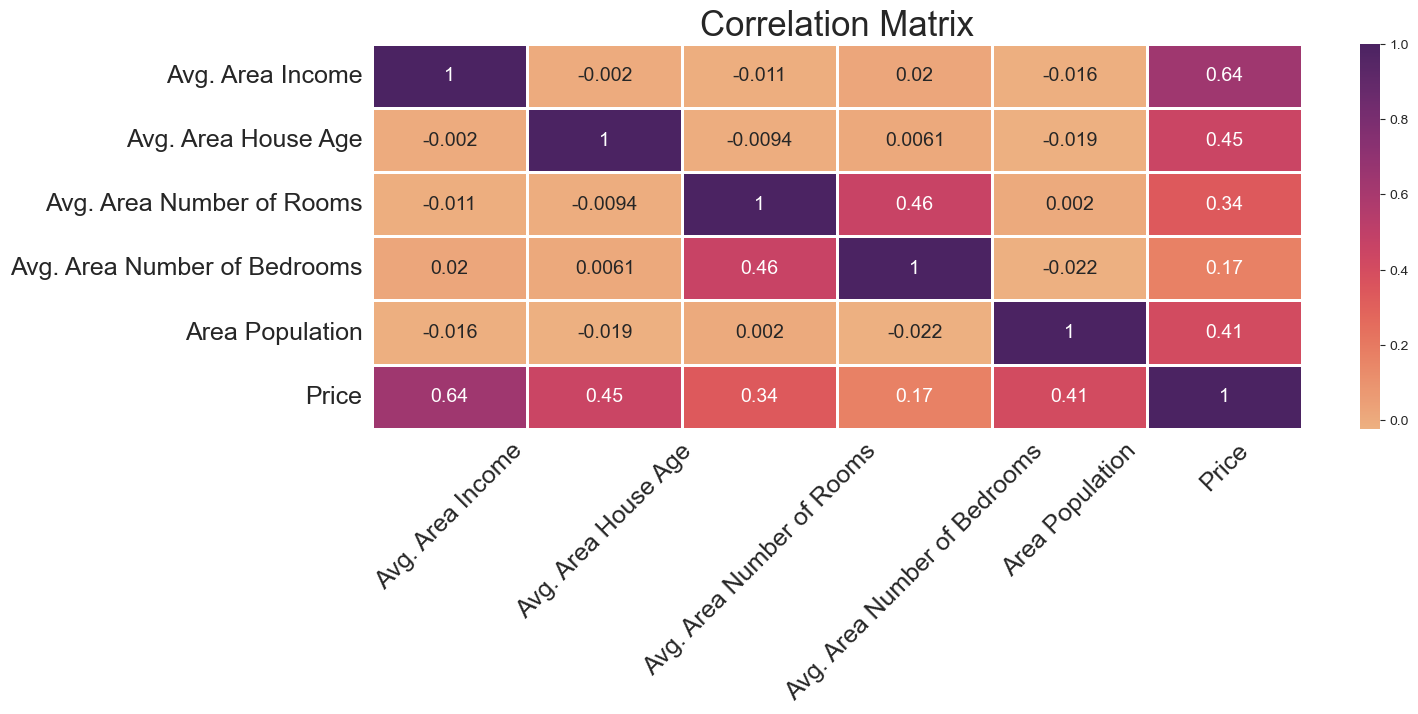

In [20]:
# My practical code
# Modify and add many things to the heatmap
sns.heatmap(housing_data.corr(), annot = True, annot_kws = {'size': 14}, cmap = 'flare', linewidths = 2, linecolor = "white")
sns.set(font_scale = 1.2)
plt.title('Correlation Matrix', fontsize = 25)
plt.xticks(fontsize = 18, rotation = 45)
plt.yticks(fontsize = 18)
plt.show()

# Train Test Split
We're now ready to begin creating and training our model. We first need to split our data into training and testing sets. This can be done using sklearn's train_test_split(X, y, test_size) function. This function takes in your features (X), the target variable (y), and the test_size you'd like (Generally a test size of around 0.3 is good enough). It will then return a tuple of X_train, X_test, y_train, y_test sets for us. We will train our model on the training set and then use the test set to evaluate the model.

In [21]:
# Example code from pdf
# Begin creating and training our model
# Importing train_test_split
from sklearn.model_selection import train_test_split

X = housing_data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]

y = housing_data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Linear Regression
We'll now import sklearn's LinearRegression model and begin training it using the fit(train_data, train_data_labels) method. In a nutshell, fitting is equal to training. Then, after it is trained, the model can be used to make predictions, usually with a predict(test_data) method call. You can think of fit as the step that finds the coefficients for the equation.

In [22]:
# Example code from pdf
# Linear Regression
# Importing LinearRegression
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

# pass our X_test data through the model (lm) to get our predictions
predictions = lm.predict(X_test)

In [23]:
# My practical code
# Lets add a StandardScaler in our LinearRegression model
# Import make_pipeline and StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lgScaler = make_pipeline(StandardScaler(), LinearRegression())
lgScaler.fit(X_train, y_train)
lgScaler_pred = lgScaler.predict(X_test)

In [24]:
# Example code from pdf
# Importing metrics and r2_score from metrics
from sklearn import metrics
from sklearn.metrics import r2_score

# printing metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score: ', r2_score(y_test, predictions))

MAE: 80529.58705743321
MSE: 10171563047.79119
RMSE: 100854.16723066622
R2 Score:  0.9167378811389573


In [25]:
# My practical code
# Printing metrics from using StandardScaler
print('Using Standarscalers')
print('MAE:', metrics.mean_absolute_error(y_test, lgScaler_pred))
print('MSE:', metrics.mean_squared_error(y_test, lgScaler_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lgScaler_pred)))
print('R2 Score: ', r2_score(y_test, lgScaler_pred))

Using Standarscalers
MAE: 80529.58705742433
MSE: 10171563047.789642
RMSE: 100854.16723065855
R2 Score:  0.9167378811389699


# Ridge Regression
Ridge Regression is a technique for analyzing multiple regression data that suffers from multicollinearity. When multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from the true value. By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors. It is hoped that the net effect will be to give estimates that are more reliable.

In [26]:
# Example code from
# Ridge Regression
# Importing Ridge
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.05, normalize = True)
ridge.fit(X_train, y_train)

predictions_ridge = ridge.predict(X_test)

# printing metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_ridge))
print('MSE:', metrics.mean_squared_error(y_test, predictions_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_ridge)))
print('R2 Score: ', r2_score(y_test, predictions_ridge))

MAE: 82042.59272237196
MSE: 10487574517.018965
RMSE: 102408.85956312064
R2 Score:  0.9141510825920014


In [27]:
# My practical code
# Lets do a Polynomial Regression
# Importing PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

poly = make_pipeline(PolynomialFeatures(), LinearRegression())
poly.fit(X_train, y_train)
poly_pred = poly.predict(X_test)

# Printing metrics
print('Using Polynomial Regression')
print('MAE:', metrics.mean_absolute_error(y_test, poly_pred))
print('MSE:', metrics.mean_squared_error(y_test, poly_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, poly_pred)))
print('R2 Score: ', r2_score(y_test, poly_pred))

Using Polynomial Regression
MAE: 80609.69881301714
MSE: 10201595112.89488
RMSE: 101002.9460604733
R2 Score:  0.9164920454338098


# Lasso Regression
The “LASSO” stands for Least Absolute Shrinkage and Selection Operator. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

The key difference to remember here is that Lasso shrinks the less important feature’s coefficient to zero, thus removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.

In [28]:
# Example code from pdf
# Lasso Regression
# Importing Lasso
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.05, normalize = True)
lasso.fit(X_train, y_train)

predictions_lasso = lasso.predict(X_test)

# printing metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_lasso))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lasso)))
print('R2 Score: ', r2_score(y_test, predictions_lasso))

MAE: 80529.52700328453
MSE: 10171552487.232948
RMSE: 100854.1148750657
R2 Score:  0.916737967585303


In [29]:
# My practical code
# Lets do a Bayesian Ridge
# Importing BayesianRidge
from sklearn.linear_model import BayesianRidge

bayesR = BayesianRidge()
bayesR.fit(X_train, y_train)

bayesR_pred = bayesR.predict(X_test)

# Printing metrics
print('Using Bayesain Ridge ')
print('MAE:', metrics.mean_absolute_error(y_test, bayesR_pred))
print('MSE:', metrics.mean_squared_error(y_test, bayesR_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, bayesR_pred)))
print('R2 Score: ', r2_score(y_test, bayesR_pred))

Using Bayesain Ridge 
MAE: 181943.02298892118
MSE: 52742663953.24351
RMSE: 229657.71041539952
R2 Score:  0.5682604596275274
